# My direct mia

In [0]:
# google colab pleaaase gimme more memory

#a = []
#while(1):
#    a.append('1')

## Imports, Download Models and Mounting Google Drive

In [1]:
# automatically reload my imports (%aimport) every time they are used
# cool feature for development
%load_ext autoreload
%autoreload 1

# needed to prevent scrollable output-subwindows
from IPython.display import Javascript

import os
import sys
# check if Notebook is loaded in google colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
  # Install TensorFlow on Google Colab
  try:
    #%tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
  except Exception:
    pass

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets
from tensorflow.keras import models
from tensorflow.keras.models import Model

TensorFlow 2.x selected.


In [2]:
# mount google drive on google colab

# catch the output of the cell
%%capture

# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# navigate to project folder
%cd ~
%cd ..
%cd content/drive/My\ Drive/nn_direct_mia
%ls

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········


In [0]:
# if using colab download needed scripts from github
#if IN_COLAB:
#  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/model_utils.py --output-document=model_utils.py
#  !wget https://raw.githubusercontent.com/hallojs/nn_direct_mia/master/data.py --output-document=data.py

# my imports
%aimport model_utils
%aimport data
mu = model_utils

In [0]:
# load pre-trained models for mnist dataset
#!pip install gdown

#if not os.path.isdir('storage'):
#    !gdown --id 10ky_fbzxxlMi4JjSvjsdiaglxmoWBgg0
#    !unzip storage.zip

## Load and Preprocess Datasets

In [4]:
# details of the datasets

# n_trgt_knwldg: size of kownledge of the target
# n_bckgrnd_knwldg: size of the background knowledge of the attacker
# n_training_set: size of training set of target and refernce models
# n_target_models: even number of target models
# n_reference_models: even number of reference models
# n_categories: number of categories for the prediction
# input_shape: sample dimensions
# dataset_path: path to the trained models etc.

# for mnist
dataset_details_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/mnist_old/',
    'categories': list(range(0,10))
}

# for fashion_mnist
dataset_details_fashion_mnist = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 40000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'input_shape': (28, 28, 1),
    'dataset_path': 'storage/fashion_mnist_old/',
    'categories': ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
}

# for cifar10
dataset_details_cifar10 = {
    'n_trgt_knwldg': 20000,
    'n_bckgrnd_knwldg': 30000,
    'n_training_set': 10000,
    'n_target_models': 100,
    'n_reference_models': 100,
    'input_shape': (32, 32, 3),
    'dataset_path': 'storage/cifar10/',
    'categories': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
                   'frog', 'horse', 'ship', 'truck']
}

# load mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
(train_images, train_labels), (test_images, test_labels) = \
datasets.mnist.load_data()
mnist_data = data.Data(train_images, train_labels, test_images, test_labels,
                       dataset_details_mnist)

# load fashion mnist dataset
# 60000 training samples <- we use this samples for our training
# 10000 test samples
#(train_images, train_labels), (test_images, test_labels) = \
#datasets.fashion_mnist.load_data()
#fashion_mnist_data = data.Data(train_images, train_labels, test_images,
#                                test_labels, dataset_details_fashion_mnist)

# load cifar 10 dataset
# 50000 training examples <- we use this samples for our training
# 10000 test examples
#(train_images, train_labels), (test_images, test_labels) = \
#datasets.cifar10.load_data()
#cifar_data = data.Data(train_images, train_labels, test_images, test_labels,
#                       dataset_details_cifar10)

# choose the dataset for this run
used_data = mnist_data

# create directory structure
mu.create_dir_structure(used_data.dataset_path)

#records_per_target_model = mu.get_records_per_target_model(used_data)
#records_per_reference_model = mu.get_records_per_reference_model(used_data)

11493376/11490434 [==============================] - 0s 0us/step


## Train Models

In [0]:
n_epochs = 50
n_batches = 50

### Train Target Models

In [0]:
%%capture
# train models and/or...
#mu.train_target_models(used_data, records_per_target_model, n_epochs,
#                       n_batches)

# ...load models
path = used_data.dataset_path + 'target_models/'
target_models = mu.load_models(path , used_data.n_target_models)
print(target_models.shape)

In [9]:
# evaluate target_models
mu.evaluate_models(target_models, used_data, n_batches)

mean_acc:  0.98608893  - min_acc:  0.9817


(0.98608893, 0.9817)

### Train Reference Models

In [0]:
%%capture
#mu.train_reference_models(used_data, records_per_reference_model, n_epochs,
#                          n_batches)
path = used_data.dataset_path + 'reference_models/'
reference_models = mu.load_models(path, used_data.n_reference_models)
print(reference_models.shape)

In [11]:
# evaluate reference_models
mu.evaluate_models(reference_models, used_data, n_batches)

mean_acc:  0.9857199  - min_acc:  0.9796


(0.9857199, 0.9796)

## Select Target Records

### Get High-Level-Features

In [0]:
# generate intermediate models from reference models
#intermediate_models = mu.gen_intermediate_models(reference_models)

# use intermediate models to generate high_level_features
# --- high level features of the target models
#high_level_features_target = \
#mu.gen_high_level_features(used_data, intermediate_models,
#                           used_data.target_train_images, 'target.npy')
high_level_features_target = np.load(used_data.dataset_path
                                     + 'high_level_features/target.npy')

# --- high level features of the reference models
#high_level_features_reference = \
#mu.gen_high_level_features(used_data, intermediate_models,
#                           used_data.reference_train_images, 'reference.npy')
high_level_features_reference = np.load(used_data.dataset_path
                                        + 'high_level_features/reference.npy')

In [0]:
high_level_features_all = np.append(high_level_features_target,
                                    high_level_features_reference, axis=0)

### Select Target Records using the High-Level-Features

In [0]:
# some possible metrices: 'euclidean', 'cosine'
metric='cosine'
#metric='euclidean'

distances = mu.calc_pairwise_distances(high_level_features_target,
                                       high_level_features_reference,
                                       used_data, metric=metric, n_jobs=1)
#distances = np.load(used_data.dataset_path
#                    + 'high_level_features/pairwise_distances_'
#                    + metric + '.npy')

<IPython.core.display.Javascript object>

min_distance:  0.0004496606634978306
mean n_neighbors:  2528.7392
mean est_n_neighbors:  1264.3696
number of target_records:  16
target_records:  [ 1075  1127  8200  8202  8867  9611  9661  9924 13376 14305 14619 14655
 14765 16676 16836 17603]
number of neighbors:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
mean distances of target records to records of the reference trainingset: [0.92317824 0.9372429  0.90600253 0.86833388 0.84920327 0.90854071
 0.90424065 0.86392    0.92848743 0.8527145  0.91350569 0.91485667
 0.95446533 0.93228044 0.90082115 0.92903087]


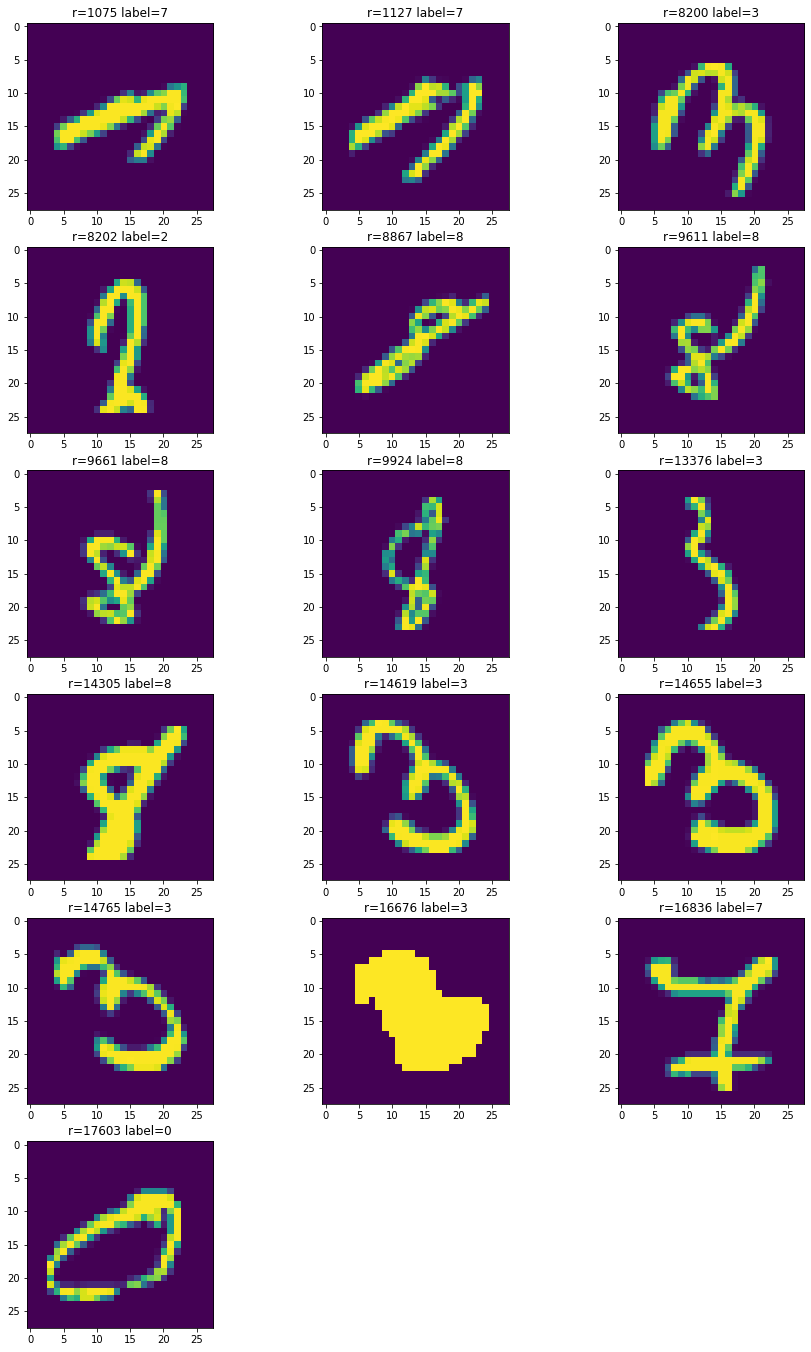

In [15]:
# needed to prevent scrollable output-subwindows
display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                        {maxHeight: 5000})'''))

# parameters for mnist, cosine
neighbor_threshold = 0.1598
probability_threshold = 0.1

# parameters for mnist, euclidean
#neighbor_threshold = 138.5
#probability_threshold = 0.1

# parameters for fashion, cosine
#neighbor_threshold = 0.1647
#probability_threshold = 0.1

# parameters for fashion, euclidean
#neighbor_threshold = 122
#probability_threshold = 0.1

# parameters for cifar, cosine
#neighbor_threshold = 0.372
#probability_threshold = 0.1

# parameters for cifar, euclidean
#neighbor_threshold = 130
#probability_threshold = 0.1

target_records, mean_distances_target = mu.select_target_records(
                                            neighbor_threshold,
                                            probability_threshold,
                                            used_data, distances)


if(len(target_records) < 20):
  mu.plot_target_records(target_records, used_data)

### Plot High-Level-Features

In [0]:
# used colors for plotting class details of mnist, fashion and cifar10
dist_colorscale = np.array(['#006400', '#00008b', '#b03060', '#ff0000',
                            '#ffff00', '#00ff00', '#00ffff', '#ff00ff',
                            '#6495ed', '#ffdead'])

In [0]:
#mu.plot3D_high_level_features_target(high_level_features_all,
#                                     used_data, target_records, dist_colorscale)

pca explained_variance_ratio:  [0.29352768 0.22038539]


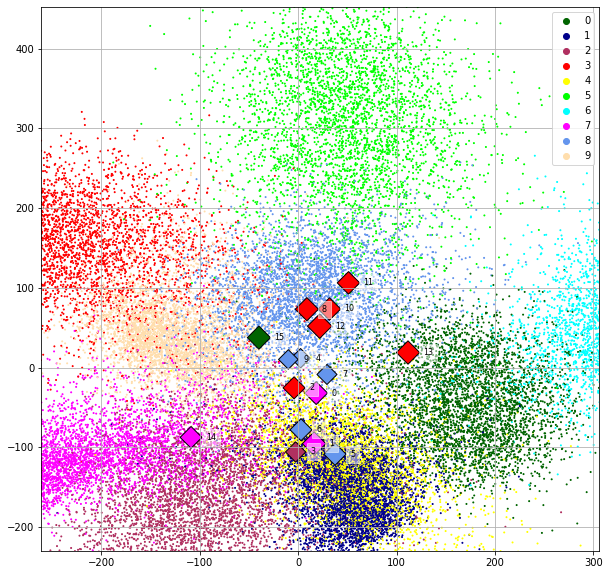

In [22]:
mu.plot2D_high_level_features_target_plt(high_level_features_all,
                                         used_data, target_records, 
                                         mean_distances_target, dist_colorscale,
                                         zoom_x=-0.2, zoom_y=-0.1, annotate=True)

## Direct Inference Attack

In [0]:
reference_inferences = mu.get_model_inference(target_records, 
                                           used_data.target_train_images, 
                                           used_data.target_train_labels,
                                           reference_models)
target_inferences = mu.get_model_inference(target_records,
                                           used_data.target_train_images,
                                           used_data.target_train_labels,
                                           target_models)

<IPython.core.display.Javascript object>

number of user target records: 16
[ 1075  1127  8200  8202  8867  9611  9661  9924 13376 14305 14619 14655
 14765 16676 16836 17603]


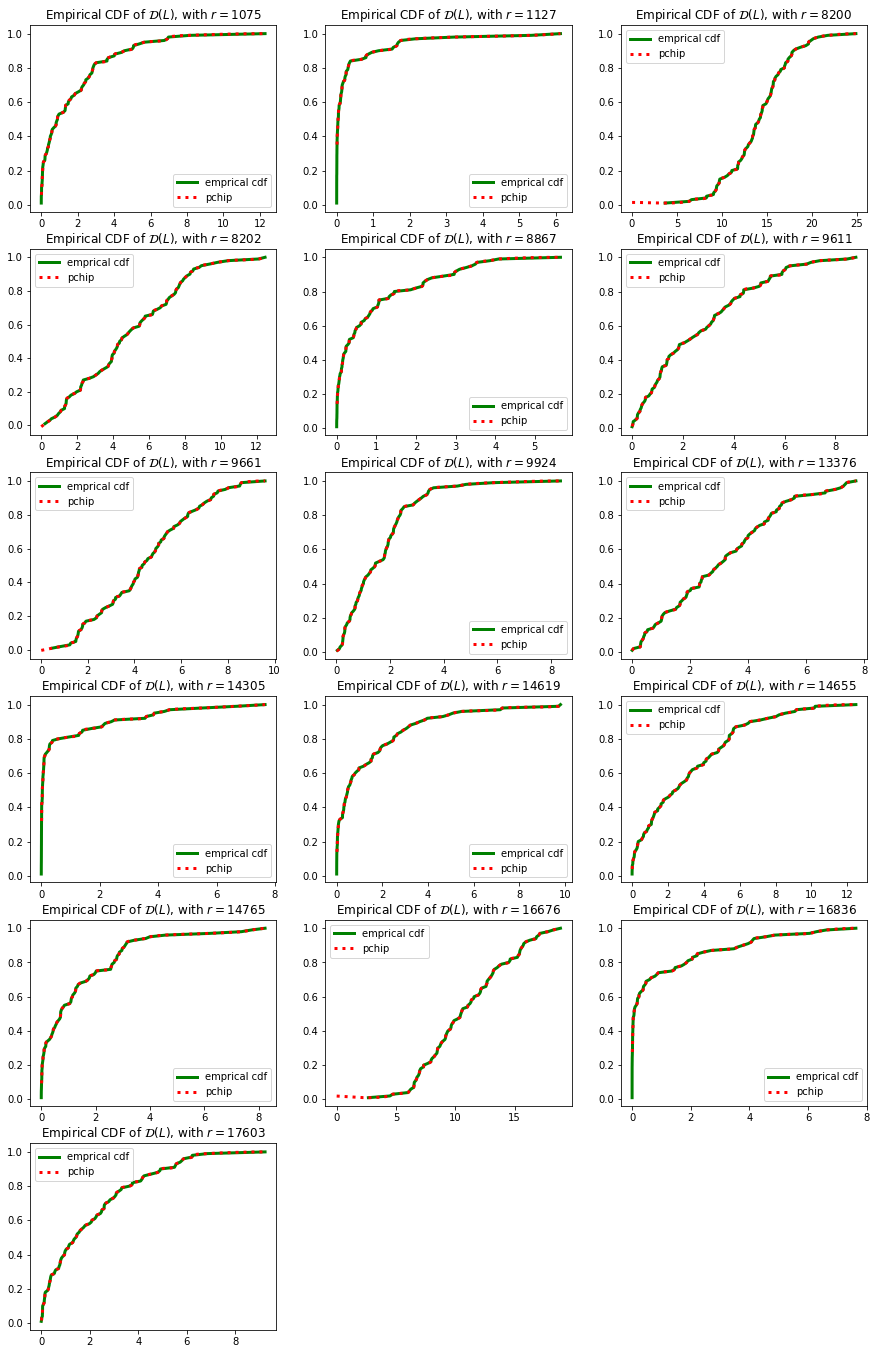

In [24]:
# needed to prevent scrollable output-subwindows
display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                        {maxHeight: 5000})'''))

used_target_records, pchip_references = \
mu.sample_reference_losses(target_records, reference_inferences)

<IPython.core.display.Javascript object>

target_record:  1075
fn:  20 tn:  46 fp:  4 tp:  30
precision:  0.8823529411764706
recall:  0.6
mean distance to records from reference dataset:  0.9672202927538722


target_record:  1127
fn:  49 tn:  50 fp:  0 tp:  1
precision:  1.0
recall:  0.02
mean distance to records from reference dataset:  0.9819559340058542


target_record:  8200
fn:  0 tn:  50 fp:  0 tp:  50
precision:  1.0
recall:  1.0
mean distance to records from reference dataset:  0.9492251842425505


target_record:  8202
fn:  0 tn:  50 fp:  0 tp:  50
precision:  1.0
recall:  1.0
mean distance to records from reference dataset:  0.9097594764232602


target_record:  8867
fn:  40 tn:  50 fp:  0 tp:  10
precision:  1.0
recall:  0.2
mean distance to records from reference dataset:  0.8897161980480657


target_record:  9611
fn:  2 tn:  25 fp:  25 tp:  48
precision:  0.6575342465753424
recall:  0.96
mean distance to records from reference dataset:  0.9518844529347937


target_record:  9661
fn:  0 tn:  36 fp:  14 tp:  50
precisi

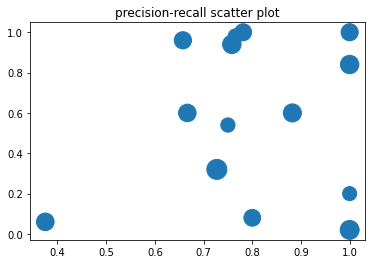

In [25]:
# needed to prevent scrollable output-subwindows
display(Javascript('''google.colab.output.setIframeHeight(0, true, 
                                                        {maxHeight: 5000})'''))

cut_off_p_value = 0.015
path = used_data.dataset_path + 'target_models/records_per_target_model.csv'
records_per_target_model = np.genfromtxt(path, delimiter=',', dtype='i')

p_values = mu.hypothesis_test(used_data, records_per_target_model, 
                              used_target_records, cut_off_p_value,
                              pchip_references, target_inferences,
                              mean_distances_target)